In [1]:
# Notebook til at se på kønsfordeling
# Evt noget i stil med dette: https://twitter.com/EricTopol/status/1419780285827215371/photo/1
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)


import matplotlib.pyplot as plt
# %matplotlib widget
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
# %matplotlib widget
import matplotlib.colors as colors
from matplotlib import cm # Colormaps

cmap = cm.get_cmap('Dark2',7)

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax = plt.gca()
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# # ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y \n %B'))


import os
import math

from datetime import date
import datetime

saveFigures = True
print('saveFigures is set to: '+str(saveFigures))
print('Done loading packages')

def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]
def rnTime2(t,meanWidth):
    return t[meanWidth-1:]


saveFigures is set to: True
Done loading packages


In [2]:
dashDir = 'ssi_dashboard/'

rootdir = os.getcwd() +"\\" + dashDir


# for subdir, dirs, files in os.walk(rootdir):
#     print(dirs)
#     if not len(dirs) == 0:
#         latestdir = subdir
#         # latestDate = pd.to_datetime(subdir[-10:])
#     # print(files)
#     # print(dirs[-1])

for f in os.scandir(rootdir):
    curPath = f.path
    latestdir = curPath
    latestDate = pd.to_datetime(curPath[-10:])

latestDate

Timestamp('2021-07-27 00:00:00')

In [3]:
curFileName = '\\Regionalt_DB\\03_bekraeftede_tilfaelde_doede_indlagte_pr_dag_pr_koen.csv'

curcsvpath = latestdir + curFileName
df = pd.read_csv(curcsvpath,delimiter = ';',dtype=str,encoding='latin-1')

df['Prøvetagningsdato'] = pd.to_datetime(df['Prøvetagningsdato'])
df['Bekræftede tilfælde'] = pd.to_numeric(df['Bekræftede tilfælde'])
df['Døde'] = pd.to_numeric(df['Døde'])
df['Indlæggelser'] = pd.to_numeric(df['Indlæggelser'])

df.tail()

,Region,Prøvetagningsdato,Køn,Bekræftede tilfælde,Døde,Indlæggelser,Kummuleret antal døde,Kummuleret antal bekræftede tilfælde,Kummuleret antal indlæggelser
4806,Hovedstaden,2021-07-26,M,36,0,0,2533,309710,15790
4807,Midtjylland,2021-07-26,M,49,0,0,2533,309759,15790
4808,Nordjylland,2021-07-26,M,14,0,0,2533,309773,15790
4809,Sjælland,2021-07-26,M,5,0,0,2533,309778,15790
4810,Syddanmark,2021-07-26,M,26,0,0,2533,309804,15790


In [29]:
allDates = pd.to_datetime(df['Prøvetagningsdato'].unique())

# dfMen = df[df['Køn'] == 'M']

caseMen = []
caseWomen = []

for d in df['Prøvetagningsdato'].unique():
    dfDay = df[df['Prøvetagningsdato']==d]

    numMen   = dfDay[dfDay['Køn'] == 'M']['Bekræftede tilfælde'].sum()
    numWomen = dfDay[dfDay['Køn'] == 'F']['Bekræftede tilfælde'].sum()

    caseMen.append(numMen)
    caseWomen.append(numWomen)
caseMen = np.array(caseMen)
caseWomen = np.array(caseWomen)

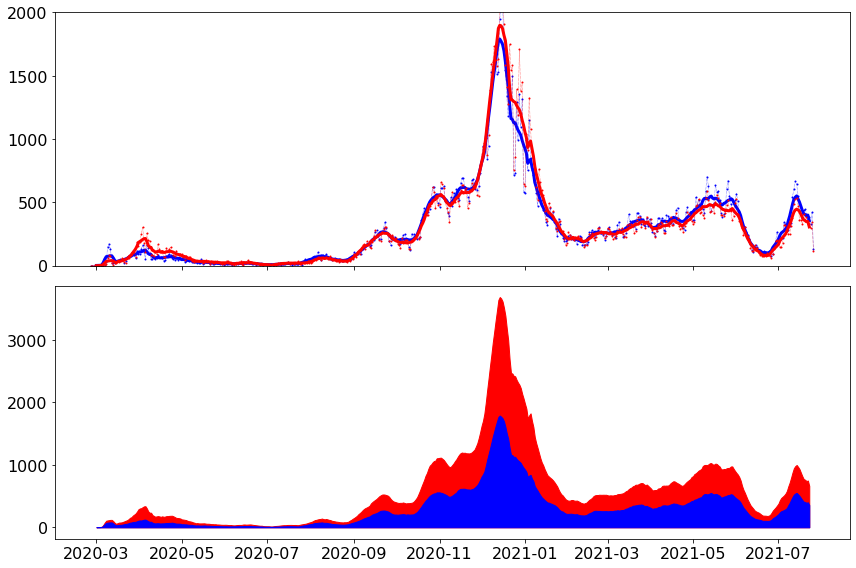

In [37]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

ax1.plot(allDates,caseMen,'b.:',markersize=2,linewidth=0.5)
ax1.plot(rnTime(allDates,7),rnMean(caseMen,7),'b')
ax1.plot(allDates,caseWomen,'r.:',markersize=2,linewidth=0.5)
ax1.plot(rnTime(allDates,7),rnMean(caseWomen,7),'r')


ax2.fill_between(rnTime(allDates,7),rnMean(caseMen,7)+rnMean(caseWomen,7),color='r')
ax2.fill_between(rnTime(allDates,7),rnMean(caseMen,7),color='b')

# ax1.set_xlim(left=np.datetime64('2021-04-01'))
ax1.set_ylim(bottom=0)
ax1.set_ylim(top=2000)

plt.tight_layout()


In [65]:
curDay+np.timedelta64(dayOffset,'D')+[-np.timedelta64(2,'h'),+np.timedelta64(2,'h')]

array(['2021-06-15T22', '2021-06-16T02'], dtype='datetime64[h]')

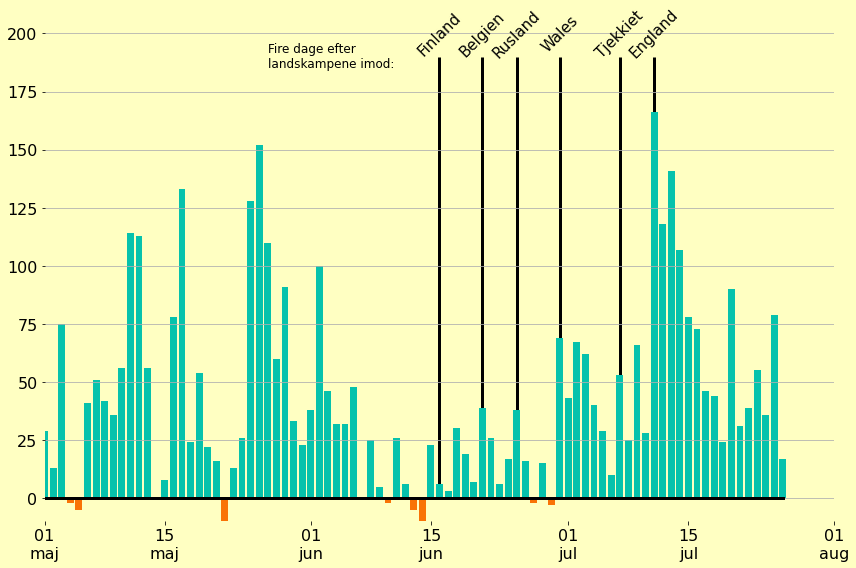

In [111]:
fig,ax1 = plt.subplots()

bgColor = 'xkcd:cream'
fig.patch.set_facecolor(bgColor)
ax1.set_facecolor(bgColor)

# genderDiff = np.array(caseMen) - np.array(caseWomen)
genderDiff = np.subtract(caseMen,caseWomen)

ax1.plot(allDates,np.zeros(genderDiff.shape),'k')


# ax1.plot(allDates,genderDiff,'.:',markersize=2,linewidth=0.5,color='xkcd:turquoise')
# ax1.plot(rnTime(allDates,7),rnMean(genderDiff,7),color='xkcd:turquoise')
# ax1.plot(allDates,genderDiff,'.:',markersize=2,linewidth=0.5,color='xkcd:turquoise')
# ax1.bar(rnTime(allDates,7),rnMean(genderDiff,7),color='xkcd:turquoise')
# ax1.bar(allDates,genderDiff,color='xkcd:turquoise')
ax1.bar(allDates,genderDiff * (genderDiff > 0),color='xkcd:turquoise')
ax1.bar(allDates,genderDiff * (genderDiff < 0),color='xkcd:orange')

ax1.set_xlim(left=np.datetime64('2021-05-01'))
ax1.set_xlim(right=np.datetime64('2021-08-01'))
# ax1.set_ylim(bottom=0)
# ax1.set_ylim(top=1000)

curMax = 200

# Show matches
dayOffset = 4

curDay = np.datetime64('2021-05-27')
ax1.text(curDay,curMax-10,'Fire dage efter \nlandskampene imod:',fontsize=12,va='center',ha='left')

# curLabel = 'Fire dage efter\nDanmark - Finland'
curDay = np.datetime64('2021-06-12')
curLabel = 'Danmark - Finland'
curLabel = 'Finland'
ax1.vlines(curDay+np.timedelta64(dayOffset,'D'),ymin=0,ymax=curMax-10,zorder=0,color='k')
ax1.text(curDay+np.timedelta64(dayOffset,'D'),curMax,curLabel,rotation=45,fontsize=15,va='center',ha='center')

curDay = np.datetime64('2021-06-17')
curLabel = 'Danmark - Belgien'
curLabel = 'Belgien'
ax1.vlines(curDay+np.timedelta64(dayOffset,'D'),ymin=0,ymax=curMax-10,zorder=0,color='k')
ax1.text(curDay+np.timedelta64(dayOffset,'D'),curMax,curLabel,rotation=45,fontsize=15,va='center',ha='center')

curDay = np.datetime64('2021-06-21')
curLabel = 'Danmark - Rusland'
curLabel = 'Rusland'
ax1.vlines(curDay+np.timedelta64(dayOffset,'D'),ymin=0,ymax=curMax-10,zorder=0,color='k')
ax1.text(curDay+np.timedelta64(dayOffset,'D'),curMax,curLabel,rotation=45,fontsize=15,va='center',ha='center')

curDay = np.datetime64('2021-06-26')
curLabel = 'Danmark - Wales'
curLabel = 'Wales'
ax1.vlines(curDay+np.timedelta64(dayOffset,'D'),ymin=0,ymax=curMax-10,zorder=0,color='k')
ax1.text(curDay+np.timedelta64(dayOffset,'D'),curMax,curLabel,rotation=45,fontsize=15,va='center',ha='center')

curDay = np.datetime64('2021-07-03')
curLabel = 'Danmark - Tjekkiet'
curLabel = 'Tjekkiet'
ax1.vlines(curDay+np.timedelta64(dayOffset,'D'),ymin=0,ymax=curMax-10,zorder=0,color='k')
ax1.text(curDay+np.timedelta64(dayOffset,'D'),curMax,curLabel,rotation=45,fontsize=15,va='center',ha='center')

curDay = np.datetime64('2021-07-07')
curLabel = 'Danmark - England'
curLabel = 'England'
ax1.vlines(curDay+np.timedelta64(dayOffset,'D'),ymin=0,ymax=curMax-10,zorder=0,color='k')
ax1.text(curDay+np.timedelta64(dayOffset,'D'),curMax,curLabel,rotation=45,fontsize=15,va='center',ha='center')




# curDay = np.datetime64('2021-06-12')
# ax1.axvspan(curDay+np.timedelta64(dayOffset,'D')-np.timedelta64(2,'h'),curDay+np.timedelta64(dayOffset,'D')+np.timedelta64(2,'h'),zorder=0,facecolor='k')
# curDay = np.datetime64('2021-06-17')
# ax1.axvspan(curDay+np.timedelta64(dayOffset,'D')-np.timedelta64(2,'h'),curDay+np.timedelta64(dayOffset,'D')+np.timedelta64(2,'h'),zorder=0,facecolor='k')
# curDay = np.datetime64('2021-06-21')
# ax1.axvspan(curDay+np.timedelta64(dayOffset,'D')-np.timedelta64(2,'h'),curDay+np.timedelta64(dayOffset,'D')+np.timedelta64(2,'h'),zorder=0,facecolor='k')
# curDay = np.datetime64('2021-06-26')
# ax1.axvspan(curDay+np.timedelta64(dayOffset,'D')-np.timedelta64(2,'h'),curDay+np.timedelta64(dayOffset,'D')+np.timedelta64(2,'h'),zorder=0,facecolor='k')
# curDay = np.datetime64('2021-07-03')
# ax1.axvspan(curDay+np.timedelta64(dayOffset,'D')-np.timedelta64(2,'h'),curDay+np.timedelta64(dayOffset,'D')+np.timedelta64(2,'h'),zorder=0,facecolor='k')
# curDay = np.datetime64('2021-07-07')
# ax1.axvspan(curDay+np.timedelta64(dayOffset,'D')-np.timedelta64(2,'h'),curDay+np.timedelta64(dayOffset,'D')+np.timedelta64(2,'h'),zorder=0,facecolor='k')

ax1.set_ylim([-10,curMax])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))

ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax1.grid(axis='y')

plt.tight_layout()

if saveFigures:
    plt.savefig('figs/FodboldGender')

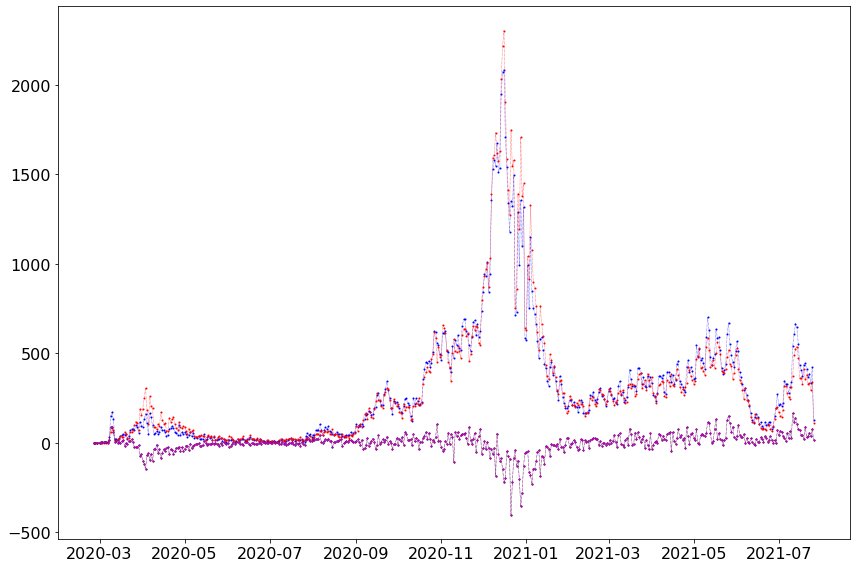

In [39]:
fig,ax1 = plt.subplots(1,1,sharex=True)

ax1.plot(allDates,caseMen,'b.:',markersize=2,linewidth=0.5)
ax1.plot(allDates,caseWomen,'r.:',markersize=2,linewidth=0.5)
ax1.plot(allDates,np.subtract(caseMen,caseWomen),'k.:',markersize=2,linewidth=0.5)
ax1.plot(allDates,caseMen-caseWomen,'m.:',markersize=2,linewidth=0.5)


plt.tight_layout()